In [1]:

from PIL import Image
import matplotlib.pyplot as plt
import fiftyone as fo
import fiftyone.zoo as foz

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Loading datasets from FiftyOne Zoo

In [2]:
fo.pprint(foz.list_zoo_datasets())

[
    'activitynet-100',
    'activitynet-200',
    'bdd100k',
    'caltech101',
    'caltech256',
    'cifar10',
    'cifar100',
    'cityscapes',
    'coco-2014',
    'coco-2017',
    'fashion-mnist',
    'fiw',
    'hmdb51',
    'imagenet-2012',
    'imagenet-sample',
    'kinetics-400',
    'kinetics-600',
    'kinetics-700',
    'kinetics-700-2020',
    'kitti',
    'kitti-multiview',
    'lfw',
    'mnist',
    'open-images-v6',
    'open-images-v7',
    'quickstart',
    'quickstart-geo',
    'quickstart-groups',
    'quickstart-video',
    'sama-coco',
    'ucf101',
    'voc-2007',
    'voc-2012',
]


In [3]:
ds = foz.load_zoo_dataset(
    name="cifar10",
    splits=["train", "test"],
    persistent=False,
    max_samples=50
)

fo.pprint(ds.stats())

Split 'train' already downloaded
Split 'test' already downloaded
Loading existing dataset 'cifar10-train-test-50'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
{
    'samples_count': 100,
    'samples_bytes': 38793,
    'samples_size': '37.9KB',
    'total_bytes': 38793,
    'total_size': '37.9KB',
}


### Getting samples from a dataset

In [5]:
# first and last samples
first_sample = ds.first()
last_sample = ds.last()

first_sample

<Sample: {
    'id': '6673812fff0161f0c5ea0c99',
    'media_type': 'image',
    'filepath': '/Users/mlstudio/fiftyone/cifar10/train/data/000001.jpg',
    'tags': ['train'],
    'metadata': <ImageMetadata: {
        'size_bytes': 1398,
        'mime_type': 'image/jpeg',
        'width': 32,
        'height': 32,
        'num_channels': 3,
    }>,
    'ground_truth': <Classification: {
        'id': '6673812fff0161f0c5ea0c98',
        'tags': [],
        'label': 'frog',
        'confidence': None,
        'logits': None,
    }>,
}>

In [6]:
first_sample["filepath"]

'/Users/mlstudio/fiftyone/cifar10/train/data/000001.jpg'

In [10]:
samples = ds.head()  # --> a list of the first 10 samples
len(samples)

3

### Taking a slice of a dataset

In [12]:
ds2 = ds.take(10)  # -> a view

print(type(ds2))

ds2

<class 'fiftyone.core.view.DatasetView'>


Dataset:     cifar10-train-test-50
Media type:  image
Num samples: 10
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Classification)
View stages:
    1. Take(size=10, seed=None)

### Read and visualize images

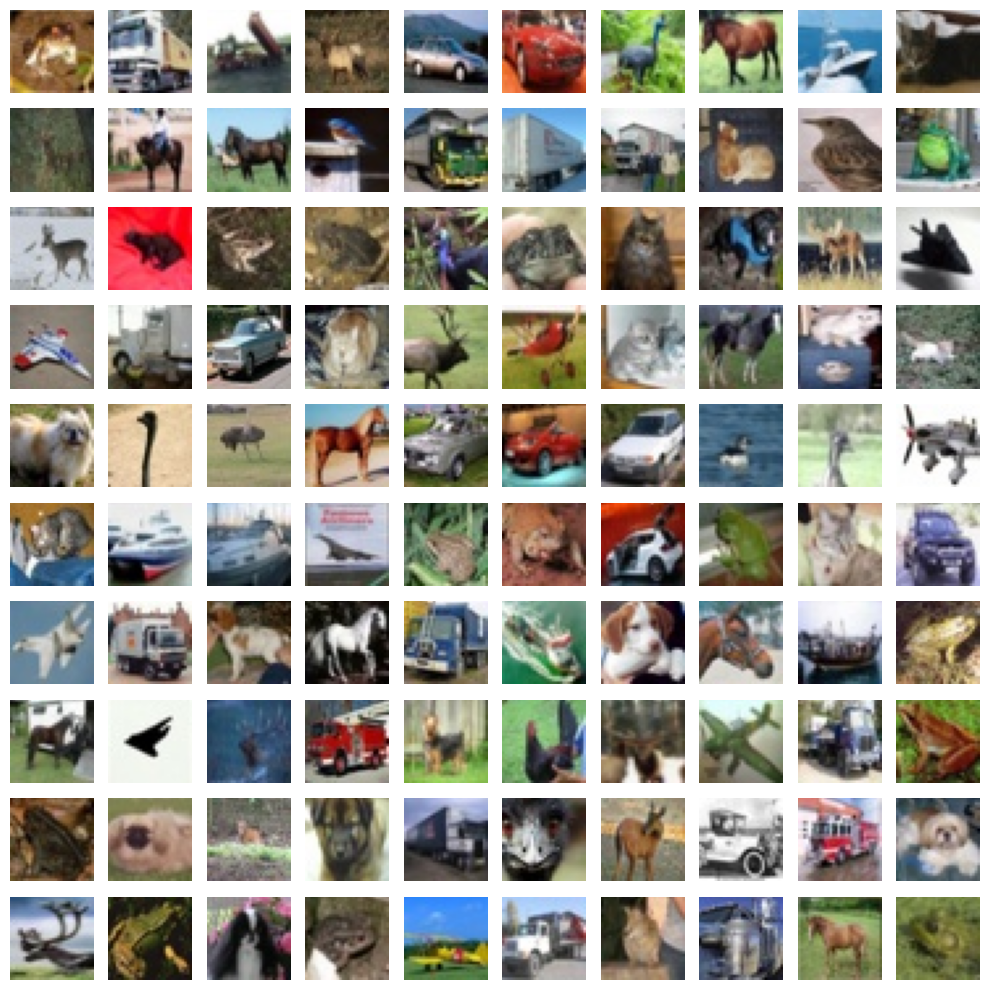

In [34]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))

for i, sample in enumerate(ds):
    row, col = i // 10, i % 10
    img = Image.open(sample["filepath"])
    axes[row, col].imshow(img)

[axes[i, j].axis('off') for i in range(10) for j in range(10)]

plt.tight_layout()
plt.show()

### Visualize with FiftyOne App

In [13]:
view = (
    ds
    .exists("ground_truth.label")
    .sort_by("ground_truth.label", reverse=True)
)
session = fo.launch_app(view)

# uncomment next line if running as a script:
#session.wait()

Connected to FiftyOne on port 5151 at localhost.
If you are not connecting to a remote session, you may need to start a new session and specify a port


### Load existing dataset

In [21]:
fo.list_datasets()

['FruitsRottenFresh_train',
 'cifar10',
 'coco-2017-train-50',
 'coco-2017-validation-sample',
 'fruits-rotten-fresh',
 'malaria-cell-images']

In [16]:
ds2 = fo.load_dataset('animal-dataset')

ds2

Name:        animal-dataset
Media type:  image
Num samples: 3
Persistent:  False
Tags:        []
Sample fields:
    id:       fiftyone.core.fields.ObjectIdField
    filepath: fiftyone.core.fields.StringField
    tags:     fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)

### Deleting a dataset

In [17]:
ds2.delete()

In [23]:
fo.list_datasets()

['FruitsRottenFresh_train',
 'cifar10',
 'coco-2017-train-50',
 'coco-2017-validation-sample',
 'fruits-rotten-fresh',
 'malaria-cell-images']